In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

yellowknife ca
vagur fo
chuy uy
rock sound bs
pevek ru
bluff nz
vaini to
rikitea pf
hilo us
tsaratanana mg
kapaa us
atuona pf
hobyo so
busselton au
modasa in
ternate id
thompson ca
victoria sc
castro cl
arraial do cabo br
goderich sl
saint-philippe re
saint-philippe re
butaritari ki
cape town za
raga sd
wazzan ma
ushuaia ar
cape town za
plettenberg bay za
kikwit cd
arraial do cabo br
dikson ru
santiago del estero ar
ushuaia ar
kurduvadi in
rikitea pf
lillesand no
atuona pf
irbil iq
upernavik gl
port elizabeth za
nouadhibou mr
butaritari ki
ippy cf
butaritari ki
dikson ru
deming us
tilichiki ru
taolanaro mg
olafsvik is
rikitea pf
rikitea pf
yellowknife ca
alofi nu
qaanaaq gl
maningrida au
rikitea pf
margate za
baykit ru
kaitangata nz
ushuaia ar
albany au
jalu ly
nantucket us
jamestown sh
byron bay au
carnarvon au
port alfred za
thompson ca
khabary ru
redmond us
padang id
illoqqortoormiut gl
saint anthony ca
thompson ca
bykovo ru
barrow us
jamestown sh
butaritari ki
aykhal ru
rikitea pf


bathsheba bb
polyarnyy ru
ushuaia ar
ponta do sol cv
alta floresta br
homer us
albany au
lagoa pt
palabuhanratu id
east london za
puerto ayora ec
yulara au
catamarca ar
harwich us
port alfred za
albany au
victoria sc
illoqqortoormiut gl
hobart au
kapaa us
amderma ru
buala sb
moose factory ca
geraldton au
hambantota lk
alexandria eg
ushuaia ar
ormara pk
nemuro jp
samusu ws
busselton au
port hardy ca
busselton au
carnarvon au
bambous virieux mu
walvis bay na
novita co
rikitea pf
mareeba au
saint anthony ca
rock sound bs
iqaluit ca
puerto ayora ec
busselton au
pokhara np
kiunga pg
constitucion cl
bukachacha ru
den helder nl
yining cn
mys shmidta ru
taolanaro mg
port alfred za
datong cn
linqiong cn
port hardy ca
hilo us
rikitea pf
severnoye ru
rikitea pf
rikitea pf
qaqortoq gl
lidzbark warminski pl
moroni km
yulara au
la ronge ca
isla aguada mx
kursumlija rs
albany au
okandja ga
aklavik ca
brownsville us
ushuaia ar
brotas br
castro cl
dikson ru
ust-kamchatsk ru
taolanaro mg
albany au
horod

san patricio mx
columbus us
carnarvon au
guerrero negro mx
samusu ws
isparta tr
peace river ca
new norfolk au
cape town za
nizwa om
saint-prosper ca
atuona pf
hasaki jp
norman wells ca
mitsamiouli km
albany au
faanui pf
rikitea pf
kalakamati bw
busselton au
cape town za
punta arenas cl
barrow us
van wert us
mount vernon us
arman ru
hobart au
barentsburg sj
mataura pf
karamea nz
qaanaaq gl
bredasdorp za
nanortalik gl
alice springs au
longyearbyen sj
provideniya ru
kuche cn
rikitea pf
belushya guba ru
tsabong bw
east london za
yellowknife ca
panacan ph
banda aceh id
nabire id
asau tv
hofn is
punta arenas cl
butaritari ki
farah af
werda bw
saint-francois gp
punta arenas cl
punta arenas cl
thinadhoo mv
khatanga ru
vaini to
hasaki jp
menongue ao
nikolskoye ru
zvenigovo ru
hasilpur pk
niksic me
busselton au
codrington ag
jieshi cn
nikolskoye ru
castro cl
ilulissat gl
hermanus za
matara lk
busselton au
ribeira grande pt
xichang cn
qaanaaq gl
acapulco mx
mataura pf
mataura pf
bluff nz
zhigansk

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | vagur
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | rock sound
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | tsaratanana
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | hobyo
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | modasa
Processing Record 16 of Set 1 | ternate
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | goderich
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | butaritari
Processing Recor

Processing Record 38 of Set 4 | grafton
Processing Record 39 of Set 4 | karaul
City not found. Skipping...
Processing Record 40 of Set 4 | teacapan
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | hailey
Processing Record 44 of Set 4 | cheyur
City not found. Skipping...
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | northampton
Processing Record 47 of Set 4 | mandalgovi
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | hambantota
Processing Record 50 of Set 4 | tibiri
Processing Record 1 of Set 5 | ceres
Processing Record 2 of Set 5 | talcahuano
Processing Record 3 of Set 5 | sembe
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | ust-nera
Processing Record 6 of Set 5 | kattivakkam
Processing Record 7 of Set 5 | pierre
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | jizan
Processing Record 10 of Set 5 | avera
Processing Record 1

Processing Record 29 of Set 8 | severnoye
Processing Record 30 of Set 8 | lidzbark warminski
Processing Record 31 of Set 8 | moroni
Processing Record 32 of Set 8 | isla aguada
Processing Record 33 of Set 8 | kursumlija
Processing Record 34 of Set 8 | okandja
City not found. Skipping...
Processing Record 35 of Set 8 | brownsville
Processing Record 36 of Set 8 | brotas
Processing Record 37 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 8 | horodnytsya
Processing Record 39 of Set 8 | oistins
Processing Record 40 of Set 8 | nikolskoye
Processing Record 41 of Set 8 | quatre cocos
Processing Record 42 of Set 8 | nyrob
Processing Record 43 of Set 8 | mahajanga
Processing Record 44 of Set 8 | leningradskiy
Processing Record 45 of Set 8 | antalaha
Processing Record 46 of Set 8 | mar del plata
Processing Record 47 of Set 8 | katiola
Processing Record 48 of Set 8 | sao joao da barra
Processing Record 49 of Set 8 | jalapa
Processing Record 50 of Set 8 | poya
Proce

Processing Record 14 of Set 12 | jogbani
Processing Record 15 of Set 12 | pacific grove
Processing Record 16 of Set 12 | half moon bay
Processing Record 17 of Set 12 | buarcos
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | north platte
Processing Record 20 of Set 12 | cervo
Processing Record 21 of Set 12 | berezna
Processing Record 22 of Set 12 | mocuba
Processing Record 23 of Set 12 | muyezerskiy
Processing Record 24 of Set 12 | evensk
Processing Record 25 of Set 12 | ballina
Processing Record 26 of Set 12 | husavik
Processing Record 27 of Set 12 | mogadishu
Processing Record 28 of Set 12 | port-cartier
Processing Record 29 of Set 12 | piranhas
Processing Record 30 of Set 12 | porto santo
Processing Record 31 of Set 12 | tongren
Processing Record 32 of Set 12 | kolpashevo
Processing Record 33 of Set 12 | anaconda
Processing Record 34 of Set 12 | eyl
Processing Record 35 of Set 12 | tehachapi
Processing Record 36 of Set 12 | sitka
Processing Record 37 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,47.28,33,20,8.05,CA,2021-05-26 02:19:48
1,Vagur,61.4732,-6.8119,45.14,91,78,21.34,FO,2021-05-26 02:19:48
2,Chuy,-33.6971,-53.4616,47.86,83,0,6.40,UY,2021-05-26 02:19:49
3,Rock Sound,24.9000,-76.2000,76.21,65,0,16.20,BS,2021-05-26 02:19:49
4,Pevek,69.7008,170.3133,33.40,84,100,3.51,RU,2021-05-26 02:19:49
5,Bluff,-46.6000,168.3333,49.80,48,66,2.06,NZ,2021-05-26 02:16:25
6,Vaini,-21.2000,-175.2000,73.56,88,90,10.36,TO,2021-05-26 02:16:24
7,Rikitea,-23.1203,-134.9692,77.68,79,56,16.60,PF,2021-05-26 02:19:50
8,Hilo,19.7297,-155.0900,79.79,80,90,10.36,US,2021-05-26 02:19:50
9,Tsaratanana,-16.7833,47.6500,64.27,74,10,4.41,MG,2021-05-26 02:19:50


In [8]:
print(len(city_data))

572


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

IsADirectoryError: [Errno 21] Is a directory: 'weather_data'

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

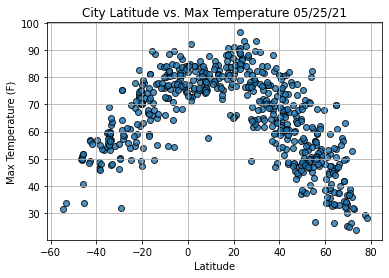

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

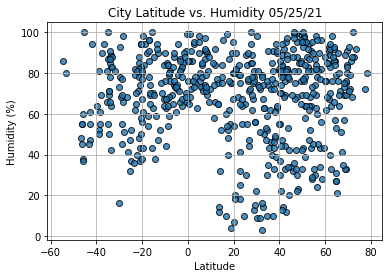

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

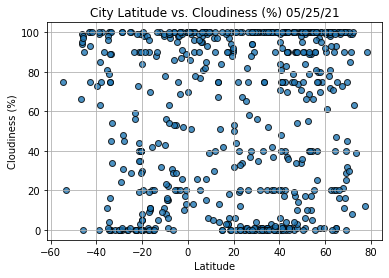

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

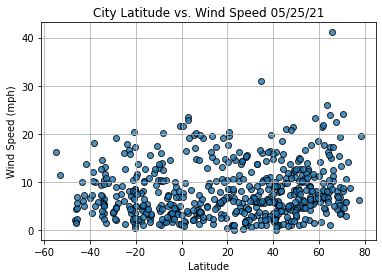

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()